<a href="https://colab.research.google.com/github/GaetanAm/Master-1-Machine-Learning/blob/main/notebooks/Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Classic Box-Muller Algorithm**

The Box-Muller Algorithm generates two independent standard normal variables
(𝑋,𝑌)(X,Y) (𝑁(0,1)N(0,1)) from two independent uniform random variables 𝑈1 and 𝑈2 on the interval [0,1]. The algorithm is based on:


1.   𝑅=𝑋2 + 𝑌2 being exponentially distributed with rate 𝜇 =1/2.
2.   Given 𝑅 the point (𝑋,𝑌) is uniformly distributed on the circle of radius 𝑅.

Steps:

1.   Generate 𝑈1,𝑈2∼𝒰([0,1]), two independent uniform random variables.
2.   Compute: 𝑅=−2log⁡(𝑈1),𝜃=2𝜋𝑈2.
3.   Compute: 𝑋=𝑅cos𝜃, 𝑌=𝑅sin⁡𝜃.
4.   Return (𝑋,𝑌).



In [ ]:
def box_muller():
    """
    Generate two independent standard normal random variables using the Box-Muller algorithm.
    Returns:
        X, Y: Two independent standard normal random variables
    """
    # Step 1: Generate two independent uniform random variables
    U1 = np.random.uniform(0, 1)
    U2 = np.random.uniform(0, 1)

    # Step 2: Compute R and theta
    R = -2 * np.log(U1)
    theta = 2 * np.pi * U2

    # Step 3: Compute X and Y
    X = np.sqrt(R) * np.cos(theta)
    Y = np.sqrt(R) * np.sin(theta)

    return X, Y

# Example usage
x, y = box_muller()
print(f"X = {x}, Y = {y}")

X = 0.40737796432505435, Y = -1.703078422823305


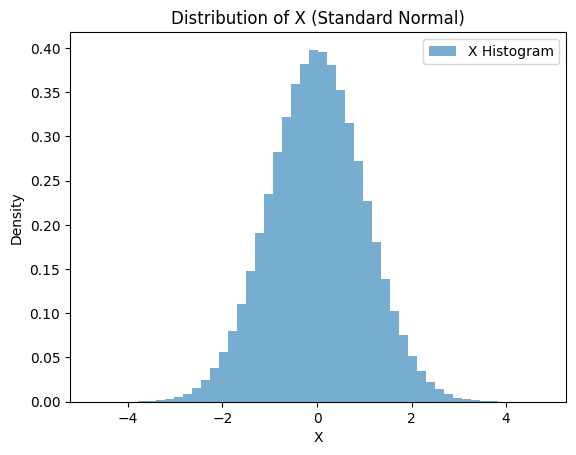

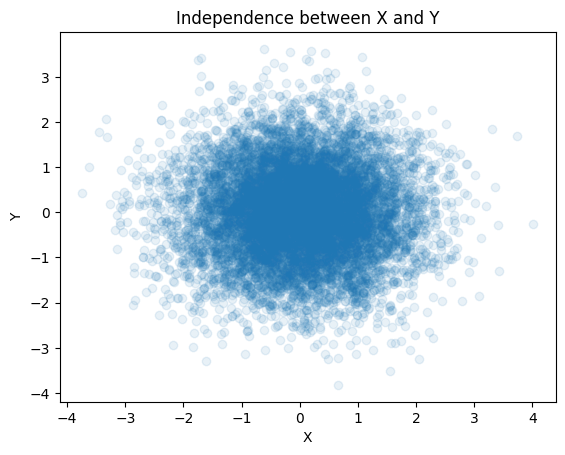

In [ ]:
# Generate a large number of samples
data_x = []
data_y = []

for _ in range(10**6):
    x, y = box_muller()
    data_x.append(x)
    data_y.append(y)

# Plot histogram for X
plt.hist(data_x, bins=50, density=True, alpha=0.6, label='X Histogram')
plt.title("Distribution of X (Standard Normal)")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.show()

# Scatter plot for X and Y to check independence
plt.scatter(data_x[:10000], data_y[:10000], alpha=0.1)
plt.title("Independence between X and Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Modified Box-Muller Algorithm

In [ ]:
def modified_box_muller():
    """
    Generate two independent standard normal random variables using the modified Box-Muller algorithm.
    Returns:
        X, Y: Two independent standard normal random variables
    """
    while True:
        # Step 1: Generate two uniform random variables in [-1, 1]
        U1 = np.random.uniform(-1, 1)
        U2 = np.random.uniform(-1, 1)

        # Step 2: Compute Z
        Z = U1**2 + U2**2

        # Step 3: Check rejection condition
        if Z <= 1:
            break

    # Step 4: Compute R
    R = -2 * np.log(Z)

    # Step 5: Compute X and Y
    X = np.sqrt(R / Z) * U1
    Y = np.sqrt(R / Z) * U2

    return X, Y

# Example usage
x, y = modified_box_muller()
print(f"Modified: X = {x}, Y = {y}")

Modified: X = 0.10460327006310775, Y = 0.39227170111805815


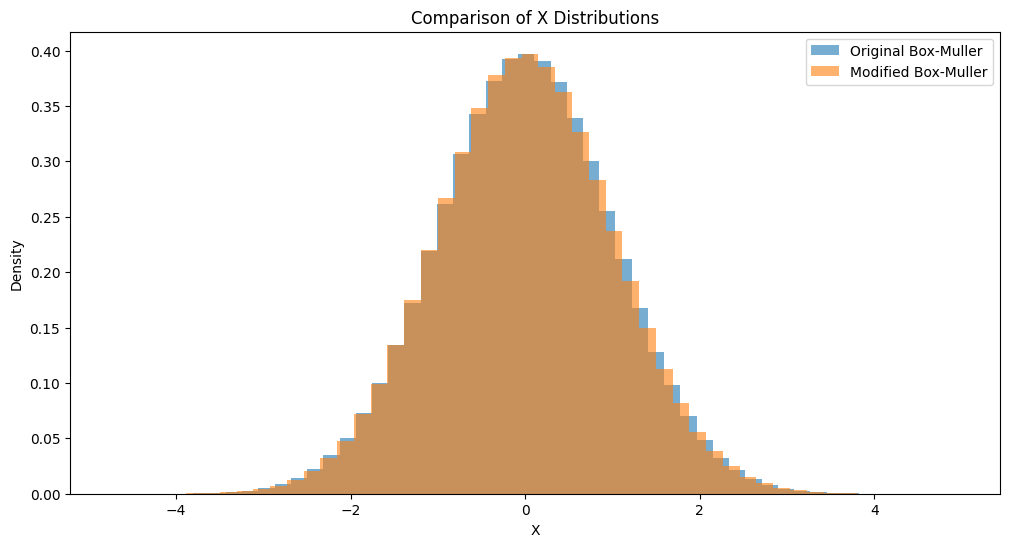

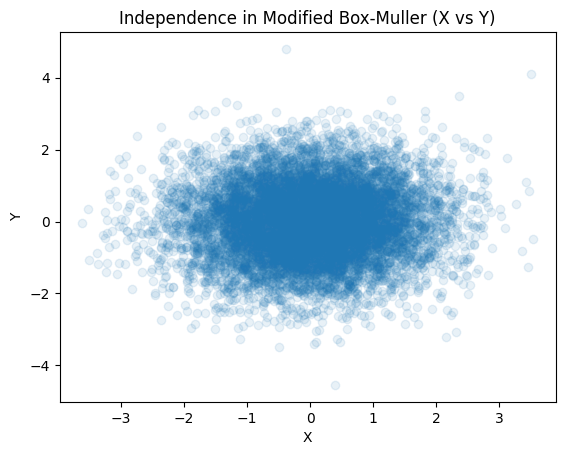

In [ ]:
# Generate data for comparison
data_original_x = []
data_original_y = []
data_modified_x = []
data_modified_y = []

for _ in range(10**6):
    # Original Box-Muller
    x1, y1 = box_muller()
    data_original_x.append(x1)
    data_original_y.append(y1)

    # Modified Box-Muller
    x2, y2 = modified_box_muller()
    data_modified_x.append(x2)
    data_modified_y.append(y2)

# Plot histograms for X (Original vs Modified)
plt.figure(figsize=(12, 6))
plt.hist(data_original_x, bins=50, density=True, alpha=0.6, label='Original Box-Muller')
plt.hist(data_modified_x, bins=50, density=True, alpha=0.6, label='Modified Box-Muller')
plt.title("Comparison of X Distributions")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.show()

# Scatter plot for X and Y (Modified)
plt.scatter(data_modified_x[:10000], data_modified_y[:10000], alpha=0.1)
plt.title("Independence in Modified Box-Muller (X vs Y)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()